#Taller 10
*Métodos Computacionales - Laboratorio*

17-Jul-2015

## Modelo de Ising 3D ✵ X 6

1. Estime la magnetización en función de la temperatura para el modelo de Ising en 3D usando una red cúbica de 20x20x20 con condiciones de frontera periódicas. Utilice al menos 1e6 iteraciones para cada temperatura. Ponga sobre la gráfica el estimado para la temperatura de transición de fase Tc ≈ 4.51 (ver Alves, Berg y Villanova  [Phys. Rev. B 41, 383](http://journals.aps.org.ezproxy.uniandes.edu.co:8080/prb/abstract/10.1103/PhysRevB.41.383)). Modifique de forma adecuada el método de Monte Carlo empleado para estudiar el modelo en 2D. Para calcular las magnetizaciones utilice los últimos diez estados calculados para cada temperatura.

![](https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesLaboratorio/master/2015-V/actividades/talleres/Taller10/ising3D.png? raw=true =200x).


  **Al terminar la clase del viernes ejecute `lottery.sh` para saber si su taller va a ser revisado.**

In [1]:
import numpy as np
import matplotlib as mpl; import matplotlib.pyplot as plt
%matplotlib inline
import os; import pickle

In [8]:
N=20
lattice=np.ones((N,N,N))
T=10.
beta=1./T
def total_energy():
    global lattice
    return -sum(sum(lattice*(np.roll(lattice,1,axis=2)+\
                             np.roll(lattice,-1,axis=2)+\
                             np.roll(lattice,1,axis=1)+\
                             np.roll(lattice,-1,axis=1)+\
                             np.roll(lattice,1,axis=0)+\
                             np.roll(lattice,-1,axis=0))))
def block_energy(i,j,k):
    global lattice
    global N
    return -(lattice[i,j,k]*(lattice[(i-1)%N,j,k]+\
                                  lattice[(i+1)%N,j,k]+\
                                  lattice[i,(j+1)%N,k]+\
                                  lattice[i,(j-1)%N,k]+\
                                  lattice[i,j,(k-1)%N]+\
                                  lattice[i,j,(k+1)%N]))
def flipone():
    global lattice
    global beta
    global N
    # Pick a random site
    nx, ny, nz= np.random.randint(0,N),np.random.randint(0,N),np.random.randint(0,N)
    # Calculate current energy of site and neighbors
    en_i=block_energy(nx,ny,nz)
    # If it were flipped
    en_f=-en_i
    if en_f<en_i: # This could be simplified
        lattice[nx,ny,nz]*=-1
    elif np.random.random()<min(1,np.exp(-beta*(en_f-en_i))):
        lattice[nx,ny,nz]*=-1

def magnetization():
    global lattice
    global N
    return sum(sum(lattice))/N**2

In [9]:
block_energy(10,10,10)

-6.0

In [12]:
magnetizaciones=[]
lattice=np.ones((N,N,N))
numIter=10**6
for temp in np.linspace(0.1,6,60):
    print temp,
    T=temp
    beta=1./T
    mag=[]
    for i in range(numIter):
        flipone()
        if i>numIter-100:
            mag.append(magnetization())
    magnetizaciones.append([T,np.mean(mag)])
magnetizaciones=np.array(magnetizaciones)

0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.0 4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.0 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.0


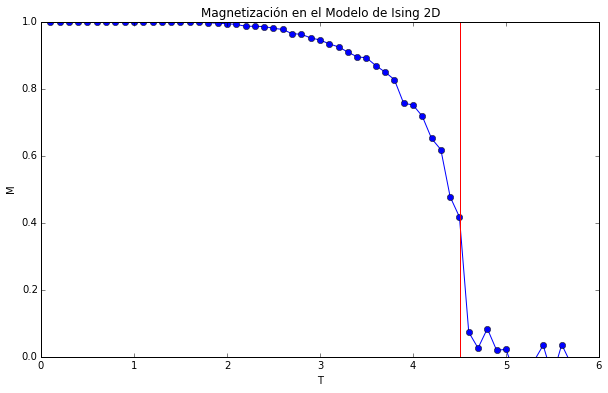

In [13]:
plt.figure(figsize=(10,6))
plt.plot(magnetizaciones[:,0],magnetizaciones[:,1],"o-")
plt.xlabel("T")
plt.ylabel("M")
plt.title(u"Magnetización en el Modelo de Ising 2D") 
plt.ylim(0,1)
plt.axvline(4.51, color='red')
plt.show()